<a href="https://colab.research.google.com/github/tanviredu/MXNET_AND_GLUON_API/blob/master/MXNET_AND_GLUON_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
!pip install mxnet

In [0]:
import mxnet as mx
from mxnet import nd
import numpy as np

In [0]:
### ND array API is the basic of the MXNET its like the tensor datastructrure Tensorflow
### exactly like the tensor in the tensorflow ND array is used in ND array
### the ND array is very related with numpy.ndarray
### ND array use lazy evaluation
### it checks the data and then define how to optimize the calculation


In [0]:
## make a two rows and three clumns
## in the nd array you use first brackets
## you have to pass like this (((tuple1),(tuple2)))
a = nd.array(((10,20,30),(40,50,60)))

In [96]:
a.shape

(2, 3)

In [97]:
## nd array lives on a context either a  cpu or a GPU
## you can find it with the context command
## this array is stored in cpy
a.context

cpu(0)

In [0]:
## you can do almost all the operation in the numpy in the ND array
## but you have to use the tuple
b = nd.ones((2,3))

In [99]:
b


[[1. 1. 1.]
 [1. 1. 1.]]
<NDArray 2x3 @cpu(0)>

In [100]:
row = 3
columns = 5
one = nd.ones((row,columns))
print(one)


[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
<NDArray 3x5 @cpu(0)>


In [0]:
## you can generate random uniform distribution
## using nd array just like the numpy array
range1 = 1
range2 = -1
row,column = 2,3
c = nd.random.uniform(range2,range1,(row,column))

In [102]:
print(c)  ## this wil give you a 2,3 matrix with uniform random value
## between the -1,1


[[-0.88394165 -0.88716334 -0.13116676]
 [-0.0243246  -0.37640822  0.76200914]]
<NDArray 2x3 @cpu(0)>


In [0]:
## you can fill array with a floating point tools
d = nd.full((row,column),5.0)

In [104]:
d


[[5. 5. 5.]
 [5. 5. 5.]]
<NDArray 2x3 @cpu(0)>

In [105]:
## you can convert a numpy array into nd array
numpy_array = [[1,2,3],[4,5,6],[7,8,9]]
print(numpy_array)

[[1, 2, 3], [4, 5, 6], [7, 8, 9]]


In [0]:
nd_array = mx.nd.array(numpy_array)

In [107]:
nd_array


[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
<NDArray 3x3 @cpu(0)>

In [0]:
# you can also convert a nd array into numpy array
num_array_again = nd_array.asnumpy()

In [109]:
num_array_again

array([[1., 2., 3.],
       [4., 5., 6.],
       [7., 8., 9.]], dtype=float32)

In [0]:
## transpose od the data
## this is the transpose data
transpose_nd_array = nd_array.T

In [111]:
print(transpose_nd_array)


[[1. 4. 7.]
 [2. 5. 8.]
 [3. 6. 9.]]
<NDArray 3x3 @cpu(0)>


In [112]:
## dot product is possible in nd array
## this is the element wise multiplication
dot_produt = mx.ndarray.dot(nd_array,nd_array)
print(dot_produt)


[[ 30.  36.  42.]
 [ 66.  81.  96.]
 [102. 126. 150.]]
<NDArray 3x3 @cpu(0)>


In [113]:
### create a multi dimansional nd array
## we can sue uniform random value in a three dimantional array
g = nd.random.uniform(0,10,(2,3,1))
print(g)


[[[6.9634347]
  [9.764044 ]
  [3.7775183]]

 [[6.176579 ]
  [1.7960368]
  [5.424988 ]]]
<NDArray 2x3x1 @cpu(0)>


In [114]:
## printing the shape of the multi dimentional array
print(g.shape)

(2, 3, 1)


In [115]:
## you can flatten the array
## and convert of the array in to flatten
print(g.flatten())


[[6.9634347 9.764044  3.7775183]
 [6.176579  1.7960368 5.424988 ]]
<NDArray 2x3 @cpu(0)>


In [116]:
## you can use the zeros and ones like th e numpy array
ones = nd.ones((2,2))
zeros = nd.zeros((2,2))
print(ones)
print(zeros)


## we ca slso make this with a conversion of the numpy
print("This is the numpy version")
numpy_ones = np.ones([2,2])
numpy_zeros = np.zeros([2,2])
print(numpy_ones)
print(numpy_zeros)
print("converting.......")
print(mx.nd.array(numpy_ones))
print(mx.nd.array(numpy_zeros))


[[1. 1.]
 [1. 1.]]
<NDArray 2x2 @cpu(0)>

[[0. 0.]
 [0. 0.]]
<NDArray 2x2 @cpu(0)>
This is the numpy version
[[1. 1.]
 [1. 1.]]
[[0. 0.]
 [0. 0.]]
converting.......

[[1. 1.]
 [1. 1.]]
<NDArray 2x2 @cpu(0)>

[[0. 0.]
 [0. 0.]]
<NDArray 2x2 @cpu(0)>


In [0]:
## you cna also use the context to set it either it will work on cpu or the GPU
x = nd.zeros((2,2),ctx=mx.cpu())

In [118]:
print(x)


[[0. 0.]
 [0. 0.]]
<NDArray 2x2 @cpu(0)>


In [0]:
# x = nd.zeros((2,2),ctx=mx.gpu())
# you cannt use this unless you have a gpu

In [0]:
## testing the lazy evaluation 
## define wo separate function that perform a long operation
import time
def long_operation(x_arr,n):
  ## we make a dot product
  return [nd.dot(x_arr,x_arr) for i in range(n)]

  ##  another function 
  ## this function will wait untill the backend engine will
  ## wait untill the alculation is done

def wait_for_computation(x_arr):
    for y in x_arr:
      y.wait_to_read()

In [0]:
### the main thing is operations will be lazily valuated
#### first the operation will be pushed to the backend engine and then
#### the back engine will check it and find a optimal way to run  this calculation
#### then it executed later

In [122]:
start_time = time.time()
## create a large array
large_array = mx.nd.ones((1000,1000))
## this is a 1000x1000 array
## perform calculation
result = long_operation(large_array,500)

## this print statement will work when all the data is pushed to the backend engine
print("All operation pushed to the backend engine")
print("{} time is needed".format(time.time()- start_time))

## now we execute out wait function
wait_for_computation(result)

print("Compurtation is finished ")
print("  {}  Time is needed".format(time.time()-start_time))


print("you can make the output wait untill all the operation is finished")
## this is the difference between numpy and ndarray
## because in numpy one by one wil be showing
## but the ndarray will hold untill the calculation is finished

All operation pushed to the backend engine
0.022423267364501953 time is needed
Compurtation is finished 
  18.28604555130005  Time is needed
you can make the output wait untill all the operation is finished


# Symbol API in MXNET
#### This is very much similler to the estimator API in tensorflow
#### this is static method that means you create a graph then you execute this graph there are Placeholder and variable operation like extimator API


In [0]:
import symbol as sym

In [0]:
## make two place holder that is called Variable
## or container
X = mx.sym.Variable('X')
y = mx.sym.Variable('y')
z = mx.sym.Variable('z')

## now making  a operation 
## we are making this operation
## result = x*y+z
## the value is not set yet
## we are just making a graph
result = (X.__mul__(y).__add__(z))


In [125]:
## we do not create any calculation we just create a graph
## to perform calulation we need to bind the data with graph
print(result)

<Symbol _plus2>


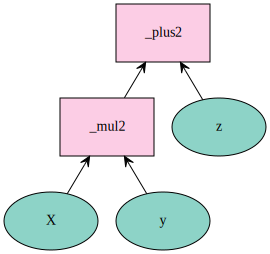

In [126]:
mx.viz.plot_network(result)

In [0]:
## so we can see the total computation graph

In [0]:
## now we make another operation 
mul = X*y
## create a dot product of the X and y
dot = mx.sym.dot(X,y)
## perform the traanspose in the z
zt = z.transpose()

## now we make a reshape function
reshape = mx.sym.reshape(dot+zt,shape=(1,4))
#Broadcasting is a mechanism that allows NDArrays to perform arithmetic 
#operations with arrays of different shapes efficiently without creating multiple copies of data

broadcast = mx.sym.broadcast_to(reshape,shape=(10,4))

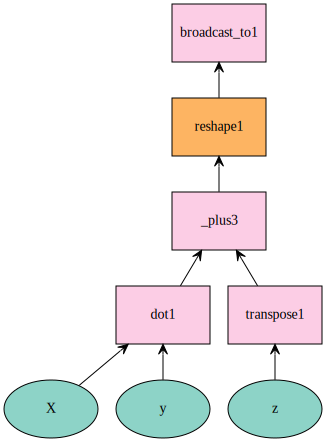

In [129]:
## nwo if we see visualize the graph
mx.viz.plot_network(symbol=broadcast)

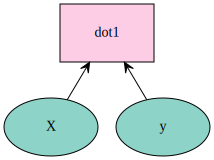

In [130]:
## You can see the part of the graph if you want
mx.viz.plot_network(symbol=dot)

In [0]:
## now we need to feed the data to the graph
## we want to deef the data for the dot operation
## we need to make two nd array
## and then bind it to the dot operation
## we will use the numpy array
## then convert it ti the nd array
import numpy as np
def convert(data):
  return mx.nd.array(data)

x_data = convert(np.array([1,1]))
y_data = convert(np.array([2,2])) 

In [0]:
## now we bind the data with the the computation graph
## it will return a computation graph
ctx = mx.cpu();
args = {'X':x_data,'y':y_data}
executor = dot.bind(ctx=ctx,args=args)

In [133]:
print(executor)

In [134]:
## t get the output of the calculation
## this function will happen
print(executor.forward())

[
[4.]
<NDArray 1 @cpu(0)>]


In [0]:
## lets make anotheer symbolic function
f=X.__pow__(y)

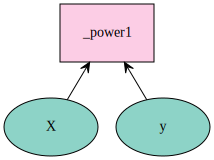

In [136]:
## again plot it with the graphviz
mx.viz.plot_network(f)

In [0]:
## now we bind out data witht the graph
executor = f.bind(mx.cpu(),{'X':convert([3]),'y':convert([2])})

In [138]:
executor.forward()

[
 [9.]
 <NDArray 1 @cpu(0)>]

In [0]:
## so thats how we feed a network data and do calculation
## we can further exytend this gaph
result = f.__sub__(z.sqrt())
executor = f.bind(mx.cpu(),{'X':convert([3]),'y':convert([3]),'z':convert([9])})

In [140]:
print(executor.forward())

[
[27.]
<NDArray 1 @cpu(0)>]


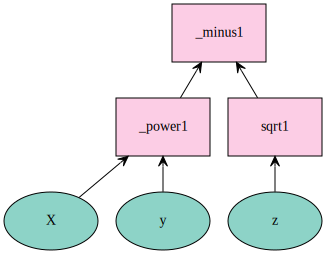

In [141]:
mx.viz.plot_network(result)

In [0]:
## mx net provide the Data iterators so we can feed the data 
## in batchs it gives us the data iterator

In [0]:
### we make some dummy data
data = np.random.rand(300,3)

In [0]:
#print(data)
## so we have three column with 300 row random value
## now we make 300 target all are from 0-9 
label = np.random.randint(0,10,(300,))

In [145]:
print(label)  ## we dont define any column so its a array of 300 value

[6 7 3 3 3 0 1 0 7 3 8 6 9 7 8 2 2 1 0 4 8 6 1 1 1 9 0 5 4 1 6 2 9 8 7 2 6
 3 1 7 8 6 1 2 0 8 8 1 8 3 1 9 5 2 5 0 9 2 4 9 5 7 4 3 1 7 3 3 9 3 6 5 7 8
 8 7 2 6 3 3 5 6 0 7 0 5 8 0 7 2 1 8 8 4 5 1 8 8 8 8 8 9 9 4 4 5 2 7 7 8 0
 7 3 6 4 2 9 2 9 3 7 5 8 4 4 3 3 5 3 3 8 1 8 6 7 3 1 7 8 6 3 8 6 6 6 3 3 3
 8 6 7 2 8 4 3 7 1 8 5 1 1 9 8 0 5 4 4 5 1 8 1 0 9 9 4 1 4 5 8 5 8 5 5 2 7
 8 3 7 0 4 2 2 6 9 1 7 4 1 1 9 4 6 8 0 0 8 0 2 9 7 5 6 6 3 1 2 7 6 4 4 6 6
 7 4 9 1 9 4 1 7 9 2 8 7 2 8 6 2 5 7 5 1 2 1 5 1 8 5 9 0 6 3 1 8 7 2 6 4 9
 9 3 8 3 6 2 7 7 7 2 1 4 0 3 3 9 6 5 1 6 4 4 1 7 9 2 2 0 7 5 1 7 2 1 2 7 9
 5 1 0 1]


In [0]:
## now making the data iterator like pytorh and make data iterator
## for feeding the data in batches
## and now wee feed the whole data to make the data iterator
data_iter = mx.io.NDArrayIter(data={'features':data},label={'labels':label},shuffle=True,batch_size=50)

In [147]:
data_iter ## we get a iterator object

In [148]:
## name and shape of the data on every epochs is found by this
data_iter.provide_data

[DataDesc[features,(50, 3),<class 'numpy.float32'>,NCHW]]

In [149]:
### you can use simple for loop to get the data
batch_num  = 1
for batch in data_iter:
  print("----------------{}-------------".format(batch_num))
  print(batch.data,batch.label)
  batch_num+=1

----------------1-------------
[
[[0.7695312  0.75561327 0.38409194]
 [0.89943206 0.19075392 0.1434713 ]
 [0.16502027 0.7209149  0.9511012 ]
 [0.7616722  0.09582645 0.00197773]
 [0.16670811 0.31409714 0.24634394]
 [0.47728986 0.08905558 0.89733326]
 [0.32365543 0.8441784  0.18544674]
 [0.8996223  0.1882214  0.21418056]
 [0.02790751 0.7256313  0.18369678]
 [0.15172063 0.43550143 0.7748512 ]
 [0.18209718 0.87601686 0.47221383]
 [0.06484019 0.17536557 0.01739547]
 [0.8235386  0.44964236 0.07243963]
 [0.291284   0.9611129  0.45171925]
 [0.07609767 0.61925083 0.5081568 ]
 [0.43453705 0.2367745  0.78731805]
 [0.62256914 0.42908382 0.4197794 ]
 [0.54642    0.95257074 0.6002535 ]
 [0.8759781  0.24298364 0.29429004]
 [0.47537062 0.9993271  0.27622285]
 [0.45931572 0.5663182  0.8644604 ]
 [0.5315121  0.41037214 0.66710186]
 [0.672603   0.58393776 0.48604587]
 [0.85188377 0.26488155 0.5411986 ]
 [0.4013673  0.18849024 0.7556426 ]
 [0.07385068 0.83909273 0.02867885]
 [0.14649619 0.73456186 0.46606

In [0]:
### we can save this data intoa csv file
### numpy alone can do this job
np.savetxt('data.csv',data,delimiter=',')

In [151]:
!ls

data.csv  sample_data


In [0]:
## we can directly load the csx in a csv iterator
csv_iter = mx.io.CSVIter(data_csv='data.csv',data_shape=(3),batch_size=50)

In [153]:
### you can use simple for loop to get the data
batch_num  = 1
for batch in csv_iter:
  print("----------------{}-------------".format(batch_num))
  print(batch.data,batch.label)
  batch_num+=1

----------------1-------------
[
[[9.39915955e-01 7.91261613e-01 9.70237255e-01]
 [6.00028455e-01 3.66488516e-01 6.95340857e-02]
 [7.20046520e-01 4.74246442e-01 5.28757870e-01]
 [4.92894173e-01 3.15120518e-01 3.83586735e-01]
 [6.25942409e-01 4.22056973e-01 1.94958627e-01]
 [9.17655349e-01 7.44594514e-01 9.02137458e-01]
 [4.88935769e-01 3.03074062e-01 6.06788516e-01]
 [5.23989081e-01 9.69656587e-01 8.76423359e-01]
 [7.28682637e-01 9.26800728e-01 1.45316944e-01]
 [9.04867768e-01 6.47037566e-01 5.66790462e-01]
 [1.65020272e-01 7.20914960e-01 9.51101184e-01]
 [1.90610483e-01 5.34588955e-02 8.35195243e-01]
 [1.38609022e-01 1.57348633e-01 2.91705847e-01]
 [7.82454461e-02 4.88417037e-02 6.84887409e-01]
 [1.98623791e-01 2.53908455e-01 2.44294137e-01]
 [4.97812271e-01 2.31954344e-02 9.29471612e-01]
 [1.79028228e-01 7.16590226e-01 8.48725975e-01]
 [2.94255078e-01 2.70984203e-01 6.61070466e-01]
 [8.99776578e-01 7.83270001e-01 8.21895957e-01]
 [3.38403761e-01 1.72494963e-01 9.37330246e-01]
 [1.759

In [0]:
## make a static computation graph and make  nural network
# for predicting brest cancer data
import pandas as pd

In [0]:
import pandas as pd

url="https://raw.githubusercontent.com/tanviredu/Breast-Cancer-UCI-Dataset/master/data.csv"
df=pd.read_csv(url)

In [156]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [0]:
d = {'M':1,'B':0}
df['diagnosis'] = df['diagnosis'].map(d)

In [158]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [159]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [0]:
labels = df['diagnosis']

In [161]:
labels_value = labels.values
labels_value

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [162]:
df = df.drop(['diagnosis','id'],axis=1)
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [0]:
data_value = df.values

In [164]:
data_value

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [165]:
batch_size = 20
data_value.shape

(569, 30)

In [0]:
train_size = int(data_value.shape[0]*.9)

In [167]:
print(train_size)

512


In [0]:
## now we make train iter and test iter
train_iter = mx.io.NDArrayIter(data = data_value[:train_size],label = labels_value[:train_size],batch_size=batch_size)
test_iter = mx.io.NDArrayIter(data = data_value[train_size:],label = labels_value[train_size:],batch_size=batch_size)

In [0]:
### define a neural network in MXNET
net = mx.sym.Variable('data')   #### place holder for the data
net = mx.sym.FullyConnected(net,name='fc1',num_hidden=250) ## 250 neuron
net = mx.sym.Activation(net,name='relu1',act_type='relu') ## relu activation function
net = mx.sym.FullyConnected(net,name='fc2',num_hidden=64) ## 64 neuron
net = mx.sym.Activation(net,name='relu2',act_type='relu') ## relu activation function
net = mx.sym.FullyConnected(net,name='fc3',num_hidden=8) ## 8 neuron
net = mx.sym.SoftmaxOutput(net,name='softmax')


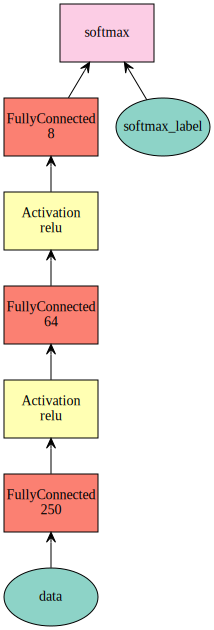

In [170]:
mx.viz.plot_network(net)

In [0]:
## wrap with the module function
mod = mx.mod.Module(symbol=net,context=mx.cpu(),data_names=['data'],label_names=['softmax_label'])

In [0]:
## bind the data with the graph
mod.bind(data_shapes=train_iter.provide_data,label_shapes=train_iter.provide_label)

In [0]:
## now we need to initialize the parameter
mod.init_params(initializer=mx.init.Uniform(scale=.01))

In [0]:
## adding a metrics to the model
metric = mx.metric.create('acc')

In [0]:
## setting the optimizer
lr = 0.001
mod.init_optimizer(optimizer='Adam',optimizer_params=(('learning_rate',lr),))

In [176]:
## now we train the model like pytorch module

for epochs in range(200):
  train_iter.reset() ### after feeding all the data in opne epochs it wilstart again from the beginning
  metric.reset() ## every accuracy will be from beginning at every epochs

  for batch in train_iter:
    ## calculate the forward for every data
    mod.forward(batch,is_train=True)
    mod.update_metric(metric,batch.label) ## find the metric with the data provided
    mod.backward() ## for  calculate the backpropagation
    mod.update() ### update value
  print("Epochs {} Train Accuracy {} ".format(epochs,metric.get()))
    


Epochs 0 Train Accuracy ('accuracy', 0.47884615384615387) 
Epochs 1 Train Accuracy ('accuracy', 0.6153846153846154) 
Epochs 2 Train Accuracy ('accuracy', 0.3576923076923077) 
Epochs 3 Train Accuracy ('accuracy', 0.4326923076923077) 
Epochs 4 Train Accuracy ('accuracy', 0.39615384615384613) 
Epochs 5 Train Accuracy ('accuracy', 0.5211538461538462) 
Epochs 6 Train Accuracy ('accuracy', 0.46153846153846156) 
Epochs 7 Train Accuracy ('accuracy', 0.6173076923076923) 
Epochs 8 Train Accuracy ('accuracy', 0.7346153846153847) 
Epochs 9 Train Accuracy ('accuracy', 0.8115384615384615) 
Epochs 10 Train Accuracy ('accuracy', 0.8423076923076923) 
Epochs 11 Train Accuracy ('accuracy', 0.8884615384615384) 
Epochs 12 Train Accuracy ('accuracy', 0.8865384615384615) 
Epochs 13 Train Accuracy ('accuracy', 0.8865384615384615) 
Epochs 14 Train Accuracy ('accuracy', 0.8865384615384615) 
Epochs 15 Train Accuracy ('accuracy', 0.8826923076923077) 
Epochs 16 Train Accuracy ('accuracy', 0.8769230769230769) 
Epoc

In [0]:
y = mod.predict(test_iter)

In [178]:
y


[[7.72098675e-02 9.22790110e-01 1.83792515e-09 2.69556577e-09
  2.35013253e-09 1.26441080e-09 2.24014363e-09 1.77979897e-09]
 [7.58690417e-01 2.40885064e-01 6.45121399e-05 8.42525114e-05
  7.79681068e-05 5.71741075e-05 7.49823448e-05 6.56266857e-05]
 [4.25182283e-01 5.74794352e-01 3.69534473e-06 4.51784399e-06
  4.16987587e-06 3.03117076e-06 4.21411914e-06 3.68206497e-06]
 [9.99383211e-01 6.16763195e-04 5.48233785e-11 1.72091799e-10
  1.38130965e-10 4.52733302e-11 9.66971017e-11 6.69361927e-11]
 [1.41227781e-03 9.98587728e-01 6.12996219e-15 1.18417578e-14
  8.37182716e-15 3.44161557e-15 1.07612919e-14 5.50044138e-15]
 [1.40181731e-03 9.98598158e-01 5.36282097e-15 1.03428669e-14
  7.30570915e-15 3.01009506e-15 9.45234220e-15 4.80989819e-15]
 [9.28569853e-01 7.13959485e-02 4.72145757e-06 7.68667996e-06
  6.79424465e-06 4.12412555e-06 6.02496084e-06 5.00332544e-06]
 [9.96623158e-01 3.37686436e-03 5.44153700e-09 1.33896085e-08
  1.11652243e-08 4.61160621e-09 8.43696046e-09 6.28187058e-09]

In [0]:
score = mod.score(test_iter,['acc'])

In [180]:
print("Accuracy score is {}".format(score))

Accuracy score is [('accuracy', 0.9833333333333333)]


In [0]:
### this process is difficult we can use keras like operation
train_iter.reset()

## create again  a new neural net
mod = mx.mod.Module(symbol=net,context=mx.cpu(),data_names=['data'],label_names=['softmax_label'])

In [0]:
mod.fit(train_iter,eval_data=test_iter,optimizer='Adam',optimizer_params={'learning_rate':.001},eval_metric='acc',num_epoch=10)

In [0]:
y = mod.predict(test_iter)

In [184]:
score = mod.score(test_iter,['acc'])
print("Accuracy score is {}".format(score))

Accuracy score is [('accuracy', 0.9333333333333333)]
